In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_csv('winequality-white.csv', delimiter=';')

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


 Dados obtidos a partir do site: https://archive.ics.uci.edu/ml/datasets/wine+quality
 
 Referência: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.
 
 Parâmetros utilizados:
 
 - fixed acidity: concentração de ácidos não voláteis. Os ácidos predominantes são: ácido tartárico, ácido málico, ácido cítrico e ácido succínico.
 - volatile acidity: concentração de ácidos voláteis. Os ácidos predominantes são: principalmente ácido acético, mas também, ácido lático, ácido fórmico, ácido butanóico e ácido propanóico.
 - citric acid: um dos tipos de ácido fixos.
 - residual sugar: açúcar residual que sobrou após o processo de fermentação de vinho terminar. 
 - chlorides: sal de ClO3-. Está dissolvido no vinho.
 - free sulfur dioxide: medida da quantidade de SO2 presente que não se encontra ligada a outras moléculas do vinho.
 - total sulfur dioxide: medida da quantidade total de SO2 presente no vinho.
 - density: densidade do vinho. A densidade é determinada principalmente pela concentração de açúcar e outros sólidos dissolvidos no vinho.
 - pH: valores típcos para o pH do vinho são entre 3.0 e 4.0 na escala de pH. Dentre os dados fornecidos, o valor de pH possui uma influência maior nos valores de S02.
 - sulphates: sal de SO4-2. Está dissolvido no vinho.
 - alcohol: Também conhecido como conteúdo alcóolico. Etanol é o principal álcool encontrado em vinhos. Etanol é um componente crítico do vinho e é produzido a partir do açúcar durante a fermentação. A concentração de etanol no vinho pode afetar o paladar, atividade microbiana, a solubilidade dos componentes e o valor das taxas aplicadas sobre o vinho.
 - quality: avaliação quanto a qualidade do vinho. 0 indica um vinho muito ruim e 10 indica um vinho muito bom.

## Tratamento das features

- Eliminar a informação sobre a concentração de ácido cítrico da variável 'fixed acidity'
- Separar a informação sobre free sulfur dioxide e bounded sulfur dioxide a partir de total sulfur dioxide

In [4]:
raw_data['fixed acidity'] = raw_data['fixed acidity'] - raw_data['citric acid']

In [5]:
raw_data['bounded sulfur dioxide'] = raw_data['total sulfur dioxide'] - raw_data['free sulfur dioxide']
raw_data = raw_data.drop('total sulfur dioxide', axis = 1)

## Análise dos dados

### Quality

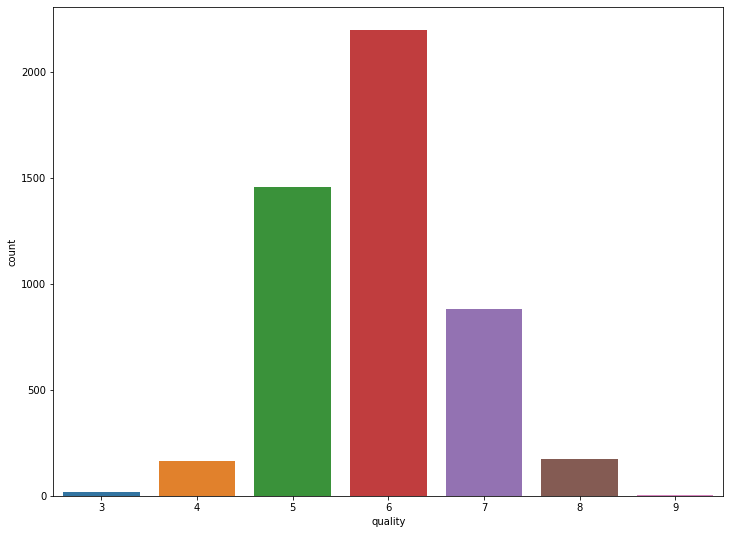

In [6]:
plt.figure(figsize=(12,9))
sns.countplot(raw_data['quality'])

In [7]:
for i in range(3,10):
    print('Existem ' + str(len(raw_data[raw_data['quality']==i])) + ' dados com avaliação de qualidade ' + str(i))

Existem 20 dados com avaliação de qualidade 3
Existem 163 dados com avaliação de qualidade 4
Existem 1457 dados com avaliação de qualidade 5
Existem 2198 dados com avaliação de qualidade 6
Existem 880 dados com avaliação de qualidade 7
Existem 175 dados com avaliação de qualidade 8
Existem 5 dados com avaliação de qualidade 9


### Iremos preparar dois modelos a partir dos dados apresentados:

1) Modelo que prevê a qualidade do vinho de acordo com a escala fornecido.
    
Prós: 
    - enxerga os parâmetros que diferenciam vinhos de forma mais precisa, uma vez que existirá menor variações dos dados dentro de uma mesma categoria. 
    
Contras: 
    - quality 3 e 9 possuem pouquíssimos dados e devem ser excluídos desta análise. Isso ainda não desqualifica o modelo para estes vinhos, uma vez que eles se encontram na fronteira de qualidade fornecida, logo, um vinho de qualidade 9 deveria ser classificado como  qualidade 8 neste modelo.
    - existe a possibilidade do modelo não capturar as propriedades que definem os vinhos de qualidade 4 e 8. Tentaremos contornar este problema através de técnincas de downsampling e oversampling.
    - o modelo não deve apresentar uma accuracy muito grande, principalmente nas qualidades limítrofes.
             
2) Modelo que prevê se o vinho é de boa qualidade (quality > 6.5) ou má qualidade (quality < 6.5)
    
Prós: 
    - não há necessidade de eliminar qualquer qualidade a priori.
    - o modelo deve apresentar boa accuracy.
    - como é uma classificação binária, outras técnicas, como KNN, podem apresentar uma melhor capacidade de classificação, ampliando as possibilidades de um blended model
    - os dados de treino não serão tão desbalanceados dentre as duas categorias. Técnicas de oversampling e undersampling não devem prejudicar tanto a accuracy do modelo.
    
Contras: 
    - o número de outliers pode ser muito grande dentro das categorias, uma vez que vinhos de qualidade 3 e 6 serão identificados da mesma forma.
    - perdemos a visão detalhada capaz de entender o que torna um vinho um pouco melhor ou pior.

In [8]:
def chapeu_seletor(qualidade):
    if qualidade > 6.5:
        return 1
    else:
        return 0

In [9]:
raw_data['classe'] = raw_data['quality'].apply(chapeu_seletor)

In [10]:
raw_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,bounded sulfur dioxide,classe
0,6.64,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6,125.0,0
1,5.96,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6,118.0,0
2,7.70,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6,67.0,0
3,6.88,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,139.0,0
4,6.88,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,139.0,0


## Modelo 1: Classificação dentro da escala

In [11]:
model1_data = raw_data.drop('classe', axis=1)

In [12]:
model1_data = model1_data[(model1_data['quality']>3 ) & (model1_data['quality']<9)]

In [13]:
model1_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4873 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fixed acidity           4873 non-null   float64
 1   volatile acidity        4873 non-null   float64
 2   citric acid             4873 non-null   float64
 3   residual sugar          4873 non-null   float64
 4   chlorides               4873 non-null   float64
 5   free sulfur dioxide     4873 non-null   float64
 6   density                 4873 non-null   float64
 7   pH                      4873 non-null   float64
 8   sulphates               4873 non-null   float64
 9   alcohol                 4873 non-null   float64
 10  quality                 4873 non-null   int64  
 11  bounded sulfur dioxide  4873 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 494.9 KB


### Variables

In [14]:
model1_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,bounded sulfur dioxide
fixed acidity,1.000000,-0.004737,0.150108,0.076859,0.005082,-0.064692,0.250897,-0.413374,-0.025894,-0.114362,-0.110465,0.125183
volatile acidity,-0.004737,1.000000,-0.150979,0.064683,0.064511,-0.101634,0.025885,-0.030630,-0.037471,0.068431,-0.194541,0.153217
citric acid,0.150108,-0.150979,1.000000,0.094917,0.114533,0.103770,0.150472,-0.163871,0.063242,-0.077185,-0.010867,0.104201
residual sugar,0.076859,0.064683,0.094917,1.000000,0.086752,0.313354,0.839600,-0.192379,-0.028357,-0.451961,-0.099011,0.344247
chlorides,0.005082,0.064511,0.114533,0.086752,1.000000,0.105537,0.255668,-0.086617,0.012031,-0.360366,-0.209607,0.189150
free sulfur dioxide,-0.064692,-0.101634,0.103770,0.313354,0.105537,1.000000,0.306361,-0.007356,0.057667,-0.258718,0.024183,0.267045
density,0.250897,0.025885,0.150472,0.839600,0.255668,0.306361,1.000000,-0.090886,0.072821,-0.780472,-0.309837,0.504304
pH,-0.413374,-0.030630,-0.163871,-0.192379,-0.086617,-0.007356,-0.090886,1.000000,0.157146,0.120173,0.099749,0.005595
sulphates,-0.025894,-0.037471,0.063242,-0.028357,0.012031,0.057667,0.072821,0.157146,1.000000,-0.015963,0.054308,0.132707
alcohol,-0.114362,0.068431,-0.077185,-0.451961,-0.360366,-0.258718,-0.780472,0.120173,-0.015963,1.000000,0.442808,-0.429154


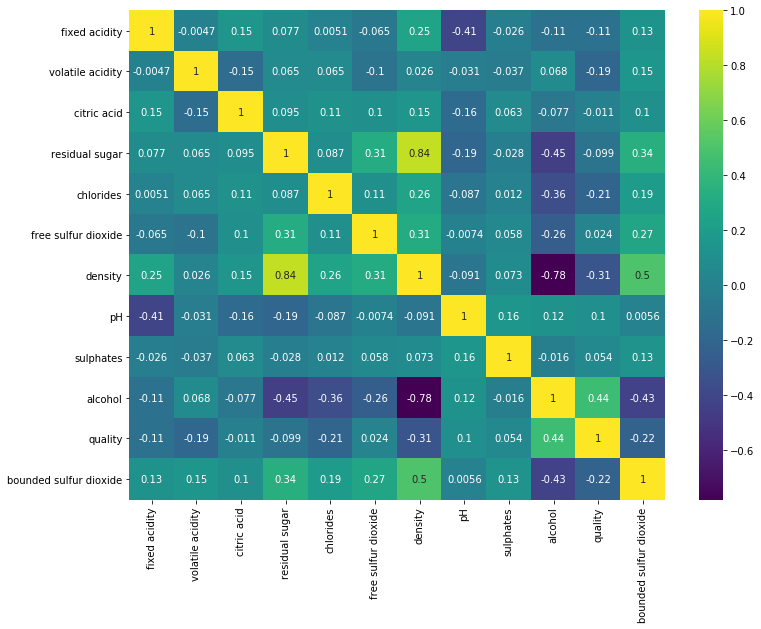

In [15]:
plt.figure(figsize=(12,9))
sns.heatmap(model1_data.corr(), cmap = 'viridis', annot = True)

#### As variáveis mais correlacionadas com quality são:
- alcohol: 44%
- density: -31%
- bounded sulfur dioxide: -22%
- chlorides: -21%
- volatile acidity: -19%

Vamos verificar a incidência de outliers nestas features e realizar o train-test-split

### Outliers

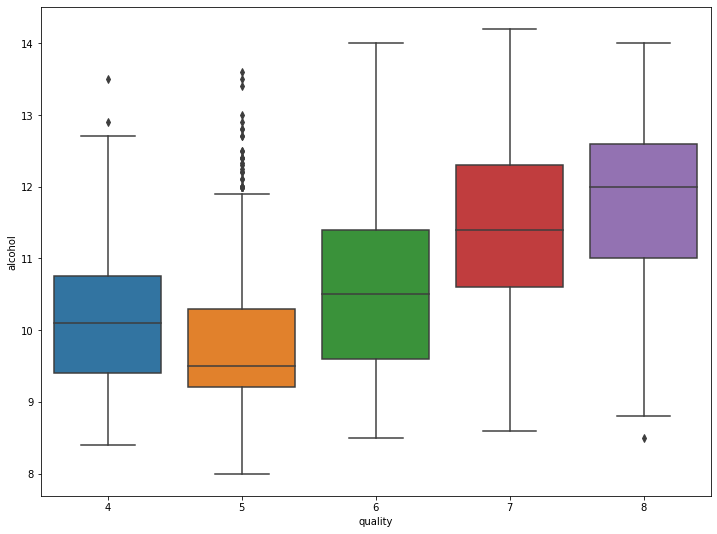

In [16]:
# Alcohol
plt.figure(figsize=(12,9))
sns.boxplot(x = 'quality', y = 'alcohol', data= model1_data)

In [17]:
model1_data_a = model1_data[(model1_data['quality'] == 4) & (model1_data['alcohol']< 12.8)  
                            | (model1_data['quality'] == 5) & (model1_data['alcohol']< 12)  
                            | (model1_data['quality'] == 6) #& (model1_data['alcohol']< 1.0) 
                            | (model1_data['quality'] == 7) #& (model1_data['alcohol']< 1.0) 
                            | (model1_data['quality'] == 8) & (model1_data['alcohol']> 8.6)
                           ]

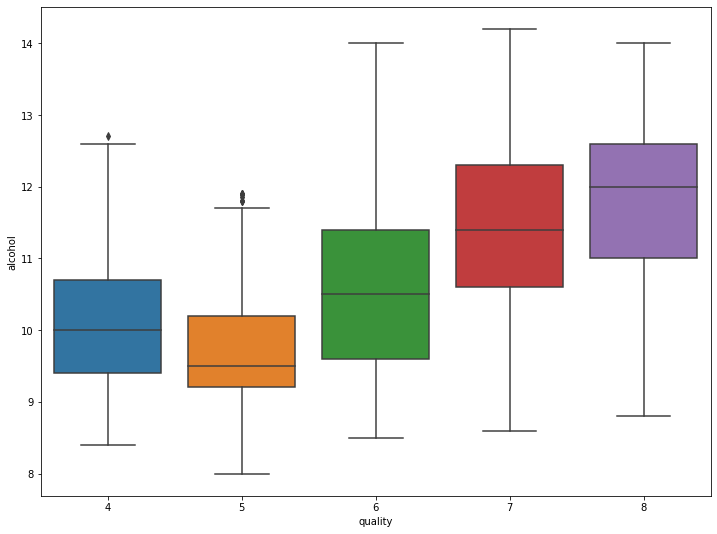

In [18]:
# Alcohol
plt.figure(figsize=(12,9))
sns.boxplot(x = 'quality', y = 'alcohol', data= model1_data_a)

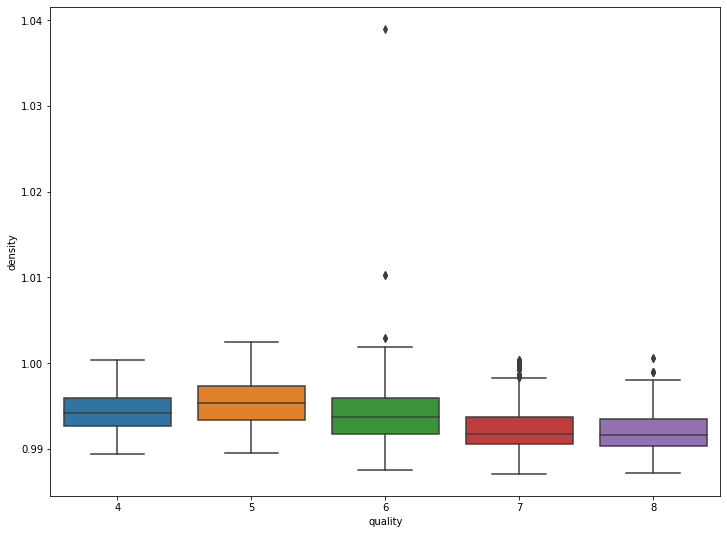

In [19]:
# density
plt.figure(figsize=(12,9))
sns.boxplot(x = 'quality', y = 'density', data= model1_data_a)

In [20]:
model1_data_ad = model1_data_a[(model1_data_a['quality'] == 4) #& (model1_data_a['density']< 12.8)  
                            | (model1_data_a['quality'] == 5) #& (model1_data_a['density']< 12)  
                            | (model1_data_a['quality'] == 6) & (model1_data_a['density']< 1.002) 
                            | (model1_data_a['quality'] == 7) & (model1_data_a['density']< 0.998) 
                            | (model1_data_a['quality'] == 8) & (model1_data_a['density']< 0.997)
                           ]

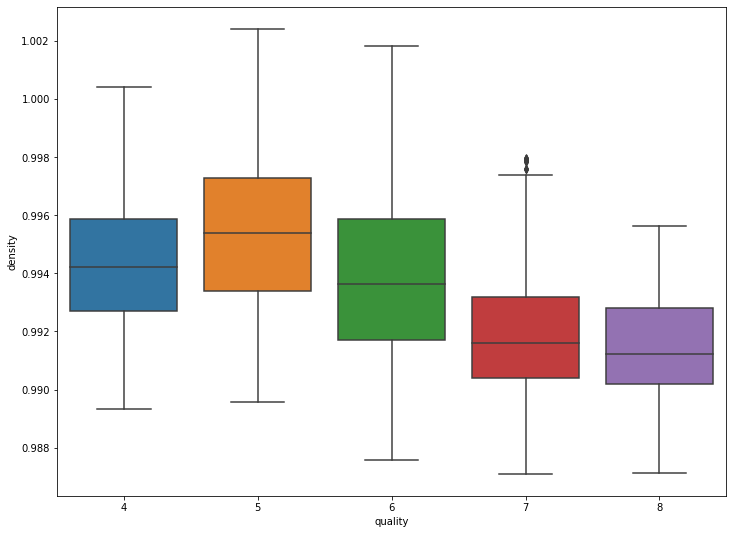

In [21]:
# density
plt.figure(figsize=(12,9))
sns.boxplot(x = 'quality', y = 'density', data= model1_data_ad)

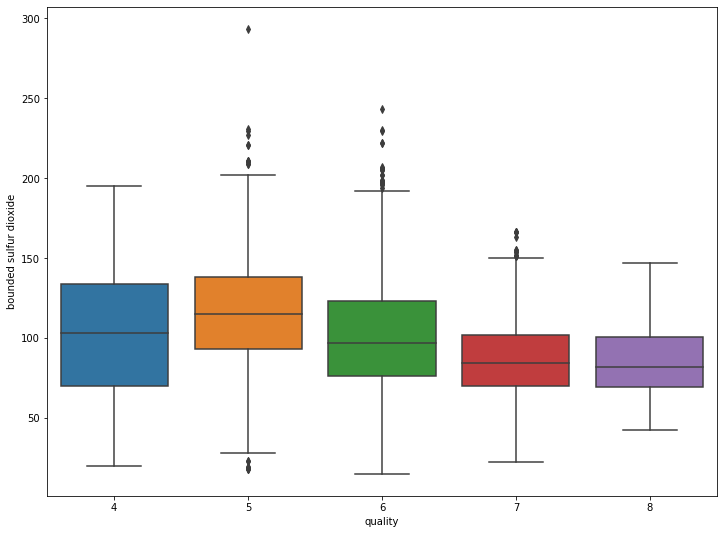

In [22]:
# bounded sulfur dioxide
plt.figure(figsize=(12,9))
sns.boxplot(x = 'quality', y = 'bounded sulfur dioxide', data= model1_data_ad)

In [23]:
model1_data_ads = model1_data_ad[(model1_data_ad['quality'] == 4) #& (model1_data_ad['bounded sulfur dioxide']< 12.8)  
                            | (model1_data_ad['quality'] == 5) & ((model1_data_ad['bounded sulfur dioxide']< 205) & (model1_data_ad['bounded sulfur dioxide']> 20))  
                            | (model1_data_ad['quality'] == 6) & (model1_data_ad['bounded sulfur dioxide']< 200) 
                            | (model1_data_ad['quality'] == 7) & (model1_data_ad['bounded sulfur dioxide']< 155) 
                            | (model1_data_ad['quality'] == 8) #& (model1_data_ad['bounded sulfur dioxide']< 0.997)
                           ]

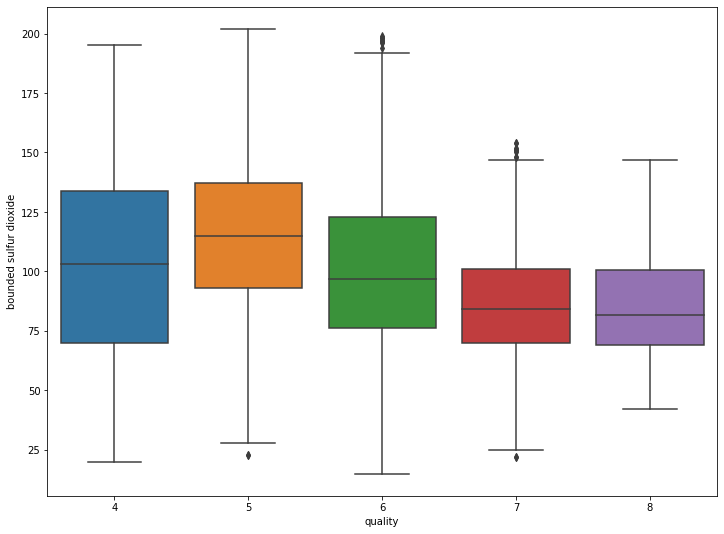

In [24]:
# bounded sulfur dioxide
plt.figure(figsize=(12,9))
sns.boxplot(x = 'quality', y = 'bounded sulfur dioxide', data= model1_data_ads)

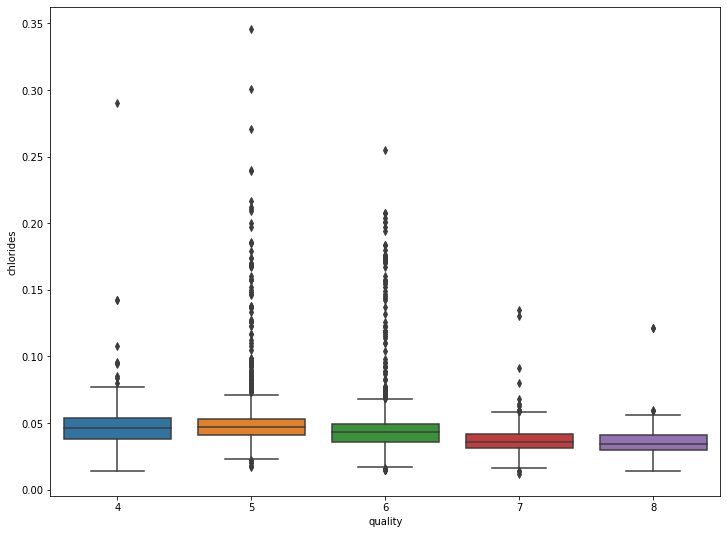

In [25]:
# chlorides
plt.figure(figsize=(12,9))
sns.boxplot(x = 'quality', y = 'chlorides', data= model1_data_ads)

In [26]:
model1_data_adsc = model1_data_ads[(model1_data_ads['quality'] == 4) & ((model1_data_ads['chlorides']< 0.07) & (model1_data_ads['chlorides']> 0.02))
                            | (model1_data_ads['quality'] == 5) & ((model1_data_ads['chlorides']< 0.07) & (model1_data_ads['chlorides']> 0.02))  
                            | (model1_data_ads['quality'] == 6) & ((model1_data_ads['chlorides']< 0.07) & (model1_data_ads['chlorides']> 0.018))
                            | (model1_data_ads['quality'] == 7) & ((model1_data_ads['chlorides']< 0.06) & (model1_data_ads['chlorides']> 0.016))
                            | (model1_data_ads['quality'] == 8) & (model1_data_ads['chlorides']< 0.06)
                           ]

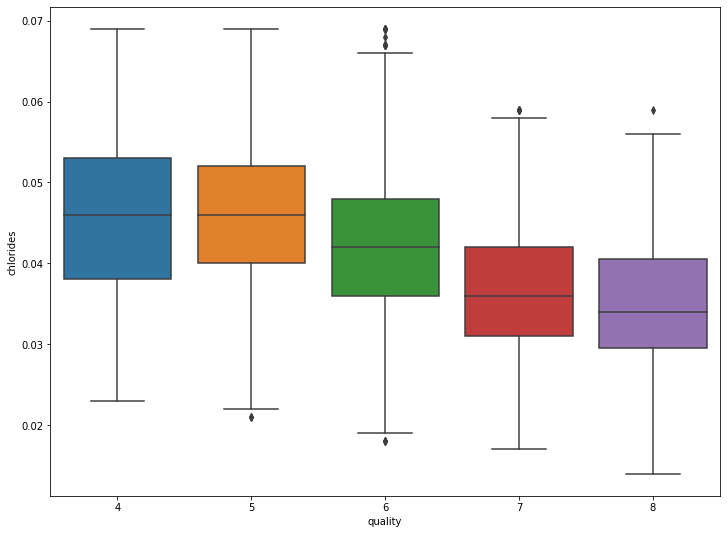

In [27]:
# chlorides
plt.figure(figsize=(12,9))
sns.boxplot(x = 'quality', y = 'chlorides', data= model1_data_adsc)

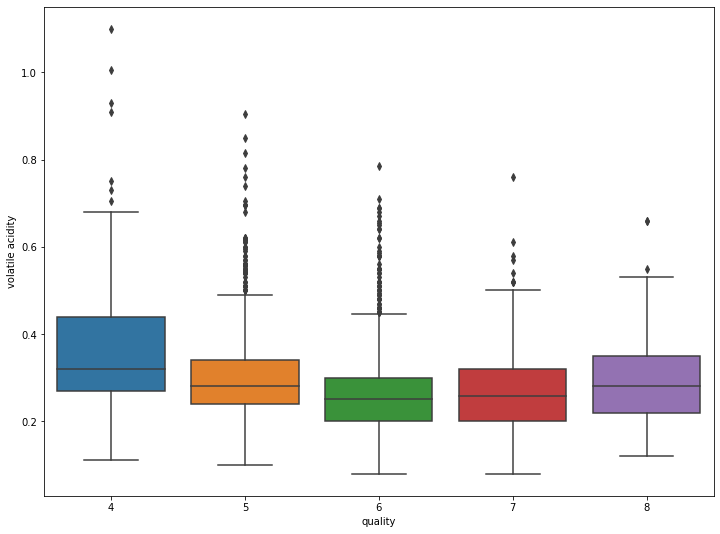

In [28]:
# volatile acidity
plt.figure(figsize=(12,9))
sns.boxplot(x = 'quality', y = 'volatile acidity', data= model1_data_adsc)

In [29]:
model1_data_adscv = model1_data_adsc[(model1_data_adsc['quality'] == 4) & (model1_data_adsc['volatile acidity']< 0.7)
                            | (model1_data_adsc['quality'] == 5) & (model1_data_adsc['volatile acidity']< 0.5)   
                            | (model1_data_adsc['quality'] == 6) & (model1_data_adsc['volatile acidity']< 0.5) 
                            | (model1_data_adsc['quality'] == 7) & (model1_data_adsc['volatile acidity']< 0.5) 
                            | (model1_data_adsc['quality'] == 8) & (model1_data_adsc['volatile acidity']< 0.6)
                           ]

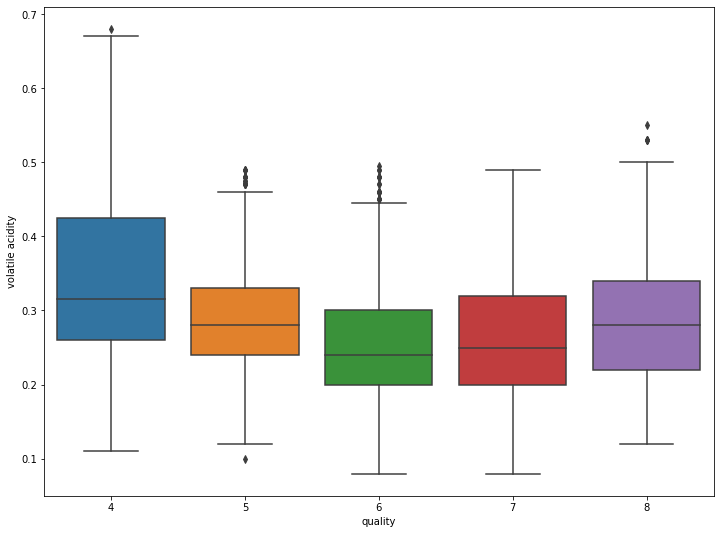

In [30]:
# volatile acidity
plt.figure(figsize=(12,9))
sns.boxplot(x = 'quality', y = 'volatile acidity', data= model1_data_adscv)

In [31]:
model1_data_adscv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4372 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fixed acidity           4372 non-null   float64
 1   volatile acidity        4372 non-null   float64
 2   citric acid             4372 non-null   float64
 3   residual sugar          4372 non-null   float64
 4   chlorides               4372 non-null   float64
 5   free sulfur dioxide     4372 non-null   float64
 6   density                 4372 non-null   float64
 7   pH                      4372 non-null   float64
 8   sulphates               4372 non-null   float64
 9   alcohol                 4372 non-null   float64
 10  quality                 4372 non-null   int64  
 11  bounded sulfur dioxide  4372 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 604.0 KB


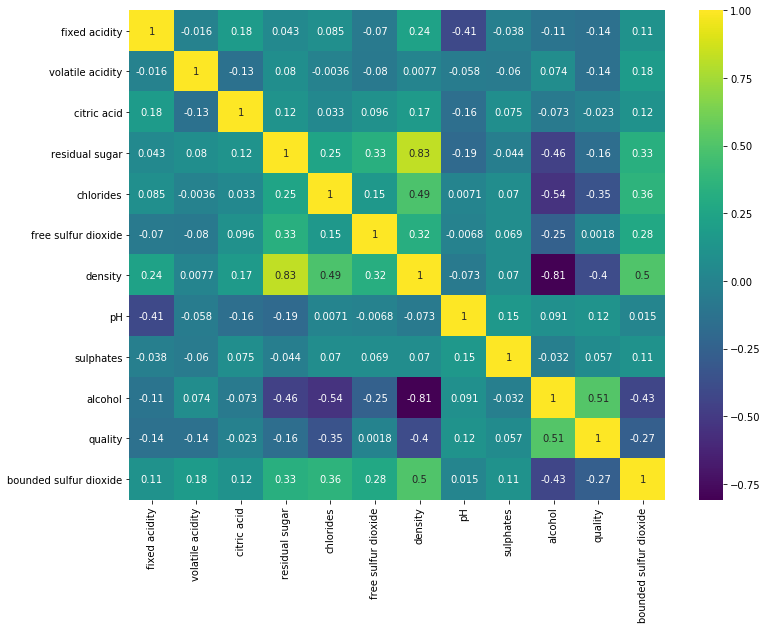

In [32]:
plt.figure(figsize=(12,9))
sns.heatmap(model1_data_adscv.corr(), cmap = 'viridis', annot = True)

A limpeza nos outliers fez a correlação entre as features e quality mudasse. Principalmente a feature residual sugar, que possuía -10% de correlação e agora apresenta -16%. Por esta razão, iremos também analisar seus outliers.

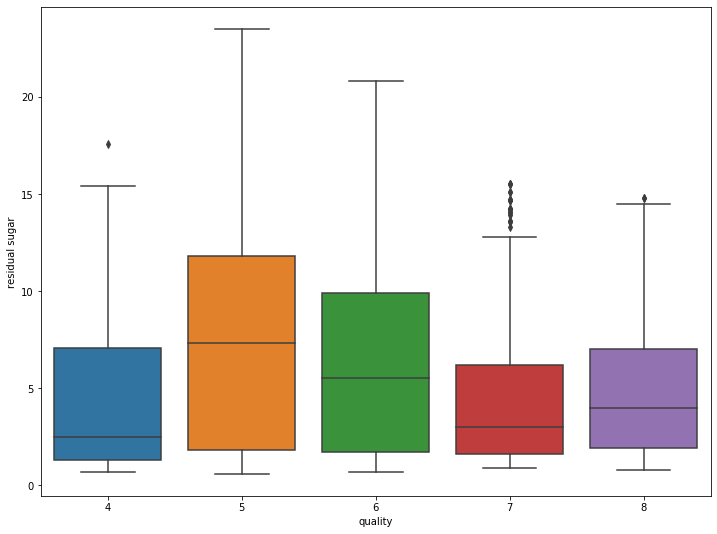

In [33]:
# residual sugar
plt.figure(figsize=(12,9))
sns.boxplot(x = 'quality', y = 'residual sugar', data= model1_data_adscv)

São poucos outliers, o próprio modelo deverá ser capaz de entender a influência deles. Não iremos arrancá-los, a priori.

### Train-test split

In [34]:
X1 = model1_data_adscv.drop('quality', axis=1)
y1 = model1_data_adscv['quality']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X1_train, X1_val, y1_train, y1_val = train_test_split(X1, y1, test_size=0.4, random_state=42)

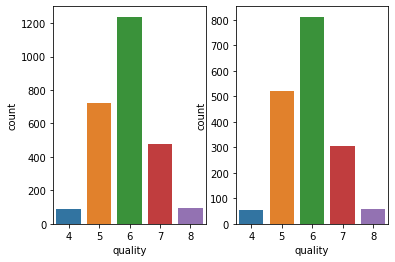

In [37]:
fig, ax =plt.subplots(1,2)
sns.countplot(y1_train, ax=ax[0])
sns.countplot(y1_val, ax=ax[1])

Dados desbalanceados, mas a distribuição das qualidades entre ambos datasets é equivalente.

In [38]:
X1_blend, X1_test, y1_blend, y1_test = train_test_split(X1_val, y1_val, test_size=0.5, random_state=42)

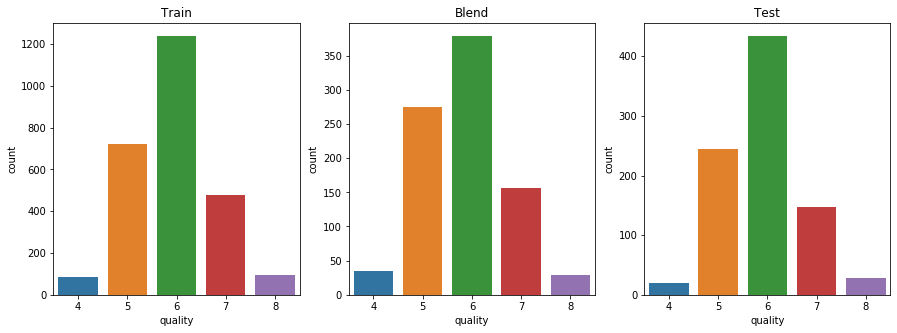

In [39]:
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(15)
ax[0].set_title('Train')
ax[1].set_title('Blend')
ax[2].set_title('Test')
sns.countplot(y1_train, ax=ax[0])
sns.countplot(y1_blend, ax=ax[1])
sns.countplot(y1_test, ax=ax[2])

Dados desbalanceados, mas a distribuição das qualidades entre ambos datasets é equivalente. O Blend apresenta uma porcentagem um pouco maior dos dados de qualidade 5.

### Reescalando as variáveis

In [40]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler1 = StandardScaler()

In [69]:
X1_train_scaled = scaler1.fit_transform(X1_train)

In [70]:
X1_blend_scaled = scaler1.transform(X1_blend)

In [71]:
X1_test_scaled = scaler1.transform(X1_test)

### Modelo 1.1: Random Forest Classifier

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
param_grid_rf = {'n_estimators':[600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400]}

In [79]:
grid_rf_11 = GridSearchCV(RandomForestClassifier(), param_grid_rf, verbose=1)

In [80]:
grid_rf_11.fit(X1_train_scaled, y1_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:  2.0min finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000]},
             verbose=1)

In [81]:
grid_rf_11.best_estimator_

RandomForestClassifier(n_estimators=800)

In [82]:
rf_pred_11 = grid_rf_11.predict(X1_test_scaled)

In [83]:
from sklearn.metrics import classification_report, confusion_matrix

In [84]:
print(classification_report(y1_test, rf_pred_11))
print('\n')
print(confusion_matrix(y1_test, rf_pred_11))

              precision    recall  f1-score   support

           4       0.67      0.40      0.50        20
           5       0.70      0.71      0.70       245
           6       0.68      0.78      0.72       434
           7       0.67      0.46      0.55       148
           8       0.92      0.43      0.59        28

    accuracy                           0.69       875
   macro avg       0.73      0.56      0.61       875
weighted avg       0.69      0.69      0.68       875



[[  8   4   8   0   0]
 [  2 174  69   0   0]
 [  2  68 338  25   1]
 [  0   4  76  68   0]
 [  0   0   8   8  12]]


### Modelo 1.2: SVM

In [85]:
from sklearn.svm import SVC

In [86]:
param_grid_svc = {'C':[0.1, 1, 10, 100, 1000, 10000],
                  'gamma':[10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]}

In [87]:
grid_svc_12 = GridSearchCV(SVC(), param_grid_svc, verbose=1)

In [88]:
grid_svc_12.fit(X1_train_scaled, y1_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed:  1.9min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001, 1e-05]},
             verbose=1)

In [90]:
grid_svc_12.best_estimator_

SVC(C=10, gamma=1)

In [91]:
svc_pred_12 = grid_svc_12.predict(X1_test_scaled)

In [92]:
print(classification_report(y1_test, svc_pred_12))
print('\n')
print(confusion_matrix(y1_test, svc_pred_12))

              precision    recall  f1-score   support

           4       0.50      0.15      0.23        20
           5       0.76      0.56      0.64       245
           6       0.62      0.85      0.72       434
           7       0.69      0.39      0.49       148
           8       0.87      0.46      0.60        28

    accuracy                           0.66       875
   macro avg       0.69      0.48      0.54       875
weighted avg       0.68      0.66      0.64       875



[[  3   1  16   0   0]
 [  2 136 107   0   0]
 [  1  39 369  24   1]
 [  0   2  88  57   1]
 [  0   0  13   2  13]]


### Modelo 1.3: Blended RF Regressor + SVR into Logistic Classifier

#### Treinando os modelos RFR e SVR

In [93]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
from sklearn.svm import SVR

In [96]:
rf_13 = RandomForestRegressor(800)

In [97]:
svr_13 = SVR(C=10, gamma=1)

In [98]:
rf_13.fit(X1_train_scaled, y1_train)

RandomForestRegressor(n_estimators=800)

In [99]:
svr_13.fit(X1_train_scaled, y1_train)

SVR(C=10, gamma=1)

#### Predição e reorganização para X1_blend

In [101]:
rf_blend = rf_13.predict(X1_blend_scaled)

In [102]:
svr_blend = svr_13.predict(X1_blend_scaled)

In [111]:
X1_blend_scaled.shape

(874, 11)

In [113]:
X1_bl_rf = np.append(X1_blend_scaled, rf_blend.reshape(874,1), axis=1)

In [114]:
X1_bl_rf.shape

(874, 12)

In [115]:
X1_bl_rf_svr = np.append(X1_bl_rf, svr_blend.reshape(874,1), axis=1)

In [116]:
X1_bl_rf_svr

array([[ 1.79802484,  1.61555125,  0.41200299, ..., -1.24198806,
         5.06375   ,  5.77627588],
       [ 0.99572716,  4.77775102,  3.43539234, ...,  2.18447686,
         4.3925    ,  5.85296681],
       [ 0.06807047,  2.5885358 ,  0.23415656, ...,  0.11625029,
         6.755     ,  6.41464788],
       ...,
       [-1.08523244, -1.06015624, -0.47722917, ..., -1.11851184,
         6.055     ,  5.97215452],
       [ 1.78548894,  0.03445137,  0.50092621, ..., -0.2850474 ,
         5.4325    ,  5.68238498],
       [-0.73422721, -1.06015624, -0.29938274, ..., -1.55067859,
         6.0175    ,  5.86270269]])

#### Predição e reorganização para X1_test

In [126]:
rf_test = rf_13.predict(X1_test_scaled)

In [127]:
svr_test = svr_13.predict(X1_test_scaled)

In [128]:
rf_test.shape

(875,)

In [130]:
X1_test_rf = np.append(X1_test_scaled, rf_test.reshape(875,1), axis=1)

In [131]:
X1_test_rf_svr = np.append(X1_test_rf, svr_test.reshape(875,1), axis=1)

#### Gerando o modelo blended

In [117]:
from sklearn.linear_model import LogisticRegression

In [157]:
blend_log = LogisticRegression(multi_class = 'multinomial', max_iter = 1000, solver='newton-cg')

In [158]:
blend_log.fit(X1_bl_rf_svr, y1_blend)

LogisticRegression(max_iter=1000, multi_class='multinomial', solver='newton-cg')

#### Predições

In [159]:
rf_13_pred = rf_13.predict(X1_test_scaled)

In [160]:
print(classification_report(y1_test, np.rint(rf_13_pred)))
print('\n')
print(confusion_matrix(y1_test, np.rint(rf_13_pred)))

              precision    recall  f1-score   support

           4       1.00      0.35      0.52        20
           5       0.70      0.73      0.71       245
           6       0.70      0.76      0.73       434
           7       0.62      0.56      0.59       148
           8       1.00      0.21      0.35        28

    accuracy                           0.69       875
   macro avg       0.80      0.52      0.58       875
weighted avg       0.70      0.69      0.68       875



[[  7   9   4   0   0]
 [  0 178  67   0   0]
 [  0  67 331  36   0]
 [  0   2  63  83   0]
 [  0   0   7  15   6]]


In [161]:
svr_13_pred = svr_13.predict(X1_test_scaled)

In [162]:
print(classification_report(y1_test, np.rint(svr_13_pred)))
print('\n')
print(confusion_matrix(y1_test, np.rint(svr_13_pred)))

              precision    recall  f1-score   support

           4       0.75      0.15      0.25        20
           5       0.80      0.52      0.63       245
           6       0.62      0.88      0.73       434
           7       0.72      0.36      0.48       148
           8       0.92      0.43      0.59        28

    accuracy                           0.66       875
   macro avg       0.76      0.47      0.54       875
weighted avg       0.70      0.66      0.64       875



[[  3   0  17   0   0]
 [  1 128 116   0   0]
 [  0  32 383  18   1]
 [  0   1  93  54   0]
 [  0   0  13   3  12]]


In [163]:
blend_log_pred = blend_log.predict(X1_test_rf_svr)

In [164]:
print(classification_report(y1_test, blend_log_pred))
print('\n')
print(confusion_matrix(y1_test, blend_log_pred))

              precision    recall  f1-score   support

           4       0.50      0.25      0.33        20
           5       0.65      0.72      0.68       245
           6       0.69      0.73      0.71       434
           7       0.60      0.52      0.56       148
           8       0.71      0.18      0.29        28

    accuracy                           0.66       875
   macro avg       0.63      0.48      0.51       875
weighted avg       0.66      0.66      0.65       875



[[  5  11   4   0   0]
 [  4 177  64   0   0]
 [  1  81 315  37   0]
 [  0   3  66  77   2]
 [  0   0   9  14   5]]


# Modelo 2: Classificação entre Boa Qualidade (1) e Má Qualidade (2)

In [42]:
model2_data = raw_data.drop('quality', axis=1)

In [43]:
model2_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,bounded sulfur dioxide,classe
fixed acidity,1.000000,-0.001303,0.150541,0.077981,0.006903,-0.064946,0.251873,-0.415544,-0.026936,-0.113622,0.124967,-0.078158
volatile acidity,-0.001303,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.027114,-0.031915,-0.035728,0.067718,0.156769,-0.067225
citric acid,0.150541,-0.149472,1.000000,0.094212,0.114364,0.094077,0.149503,-0.163748,0.062331,-0.075729,0.102179,-0.035330
residual sugar,0.077981,0.064286,0.094212,1.000000,0.088685,0.299098,0.838966,-0.194133,-0.026664,-0.450631,0.344844,-0.117085
chlorides,0.006903,0.070512,0.114364,0.088685,1.000000,0.101392,0.257211,-0.090439,0.016763,-0.360189,0.193795,-0.183118
free sulfur dioxide,-0.064946,-0.097012,0.094077,0.299098,0.101392,1.000000,0.294210,-0.000618,0.059217,-0.250104,0.263537,-0.023413
density,0.251873,0.027114,0.149503,0.838966,0.257211,0.294210,1.000000,-0.093591,0.074493,-0.780138,0.504447,-0.283871
pH,-0.415544,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,-0.093591,1.000000,0.155951,0.121432,0.003143,0.093510
sulphates,-0.026936,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.074493,0.155951,1.000000,-0.017433,0.135694,0.047410
alcohol,-0.113622,0.067718,-0.075729,-0.450631,-0.360189,-0.250104,-0.780138,0.121432,-0.017433,1.000000,-0.426923,0.385132


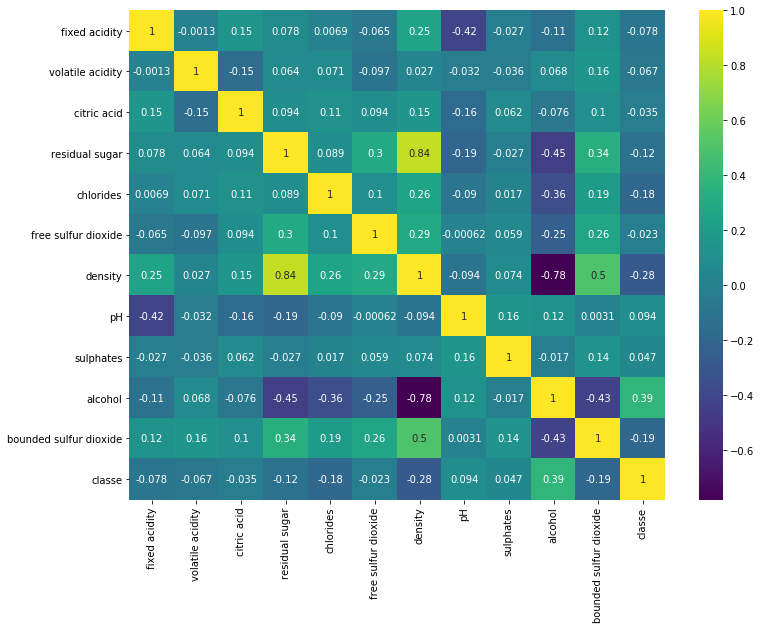

In [44]:
plt.figure(figsize=(12,9))
sns.heatmap(model2_data.corr(), cmap='viridis', annot = True)

#### As variáveis mais correlacionadas com classe são:
- alcohol: 39%
- density: -28%
- bounded sulfur dioxide: -19%
- chlorides: -18%
- residual sugar: -12%

Vamos verificar a incidência de outliers nestas features e realizar o train-test-split.

### Outliers

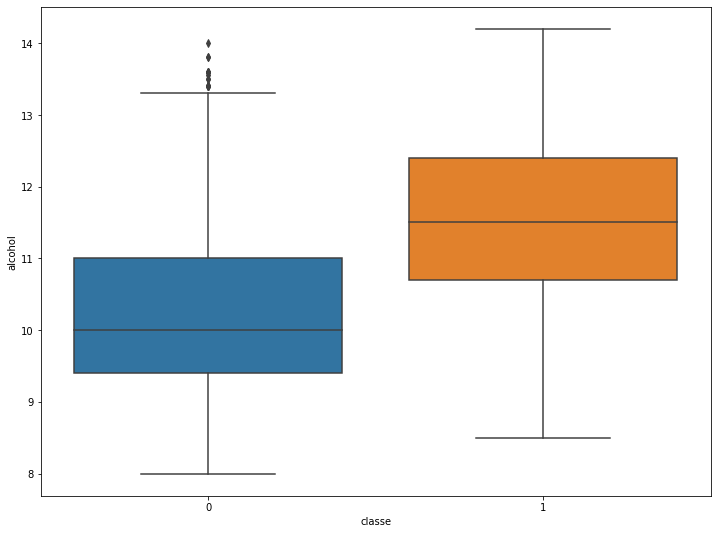

In [45]:
# Alcohol
plt.figure(figsize=(12,9))
sns.boxplot(x = 'classe', y = 'alcohol', data= model2_data)

In [46]:
model2_data_a = model2_data[(model2_data['classe'] == 0) & (model2_data['alcohol']< 13.3)  
                            | (model2_data['classe'] == 1) #& (model2_data['alcohol']< 12)  
                           ]

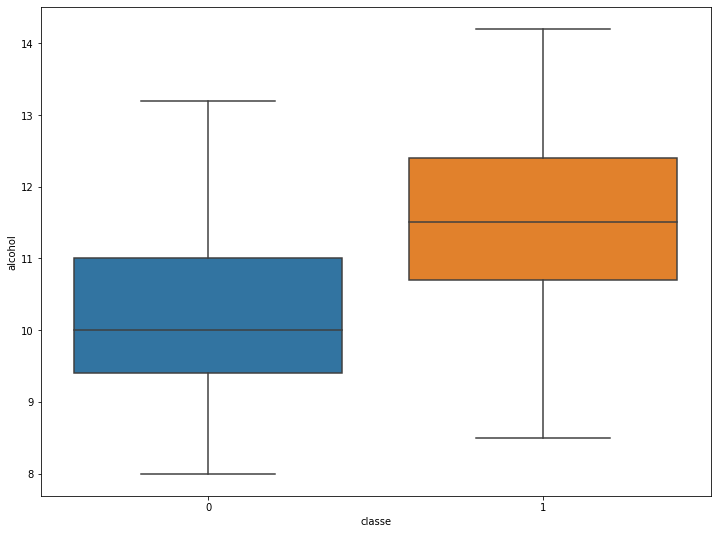

In [47]:
# Alcohol
plt.figure(figsize=(12,9))
sns.boxplot(x = 'classe', y = 'alcohol', data= model2_data_a)

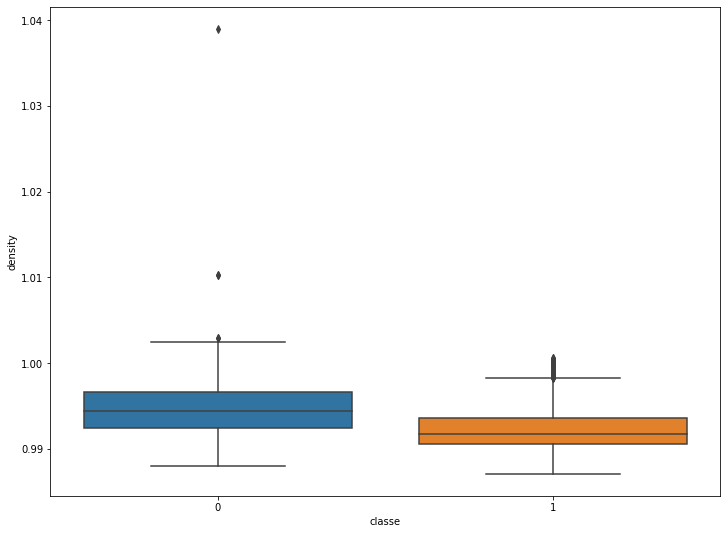

In [48]:
# density
plt.figure(figsize=(12,9))
sns.boxplot(x = 'classe', y = 'density', data= model2_data_a)

In [49]:
model2_data_ad = model2_data_a[(model2_data_a['classe'] == 0) & (model2_data_a['density']< 1.005)  
                            | (model2_data_a['classe'] == 1) & (model2_data_a['density']< 0.998)  
                           ]

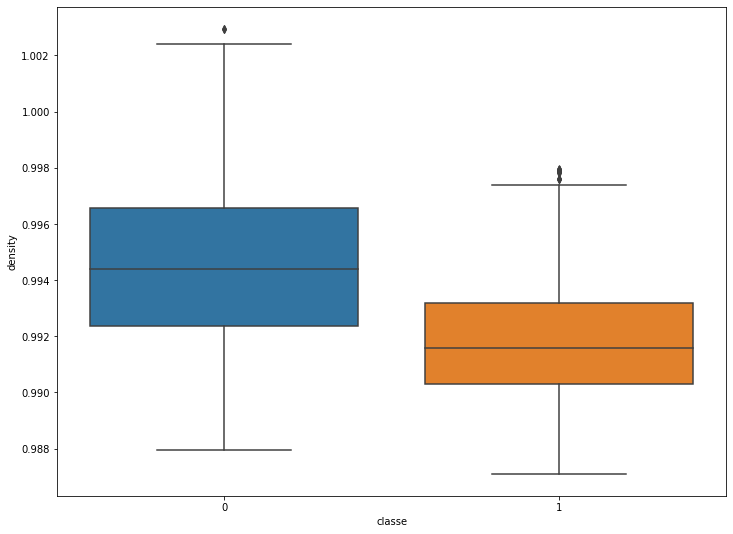

In [50]:
# density
plt.figure(figsize=(12,9))
sns.boxplot(x = 'classe', y = 'density', data= model2_data_ad)

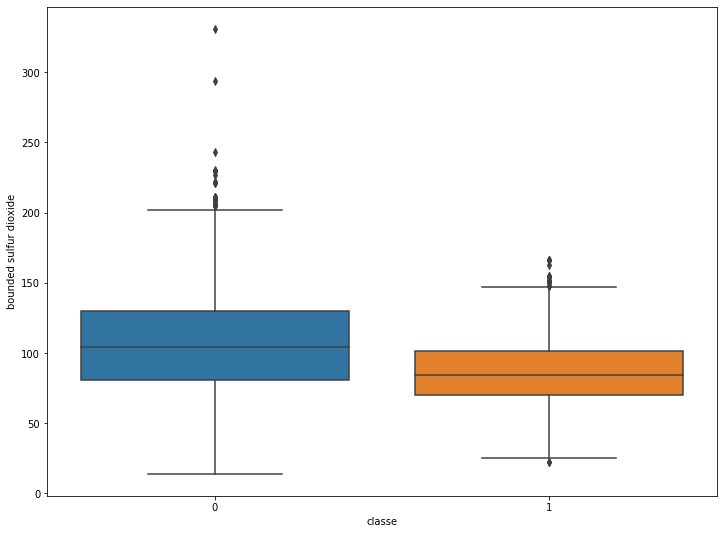

In [51]:
# bounded sulfur dioxide
plt.figure(figsize=(12,9))
sns.boxplot(x = 'classe', y = 'bounded sulfur dioxide', data= model2_data_ad)

In [52]:
model2_data_ads = model2_data_ad[(model2_data_ad['classe'] == 0) & (model2_data_ad['bounded sulfur dioxide']< 200)  
                            | (model2_data_ad['classe'] == 1) & (model2_data_ad['bounded sulfur dioxide']< 150)  
                           ]

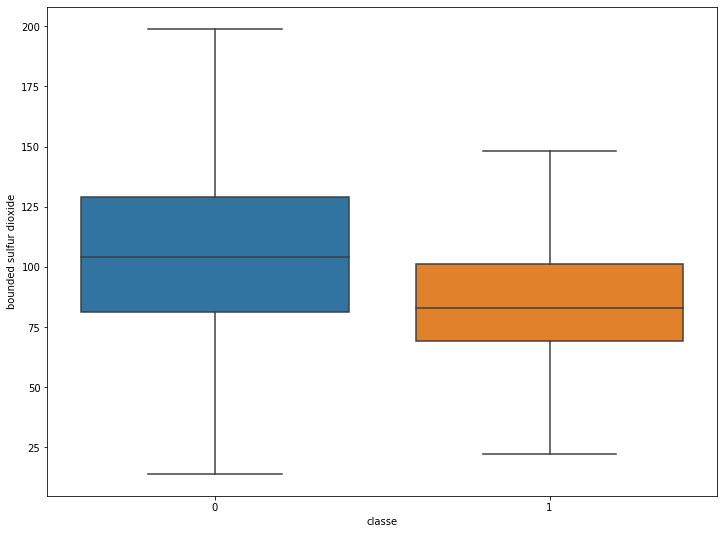

In [53]:
# bounded sulfur dioxide
plt.figure(figsize=(12,9))
sns.boxplot(x = 'classe', y = 'bounded sulfur dioxide', data= model2_data_ads)

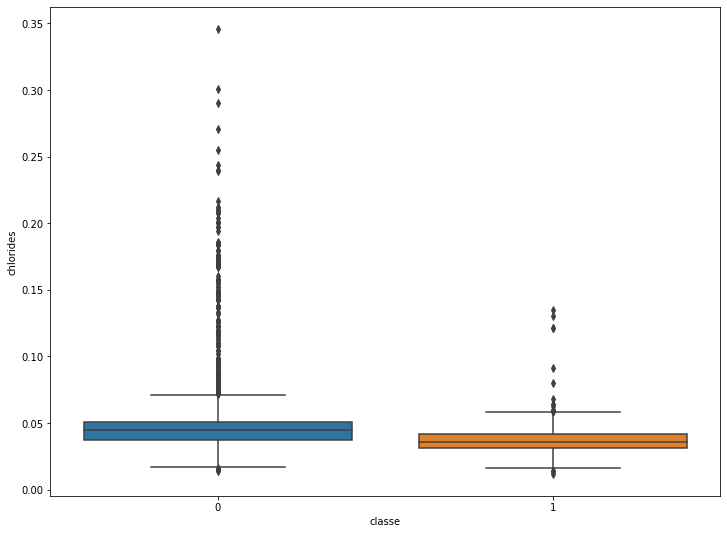

In [54]:
# chlorides
plt.figure(figsize=(12,9))
sns.boxplot(x = 'classe', y = 'chlorides', data= model2_data_ads)

In [55]:
model2_data_adsc = model2_data_ads[(model2_data_ads['classe'] == 0) & ((model2_data_ads['chlorides']< 0.07) & (model2_data_ads['chlorides'] > 0.019))
                            | (model2_data_ads['classe'] == 1) & ((model2_data_ads['chlorides']< 0.055) & (model2_data_ads['chlorides'] > 0.015))
                           ]

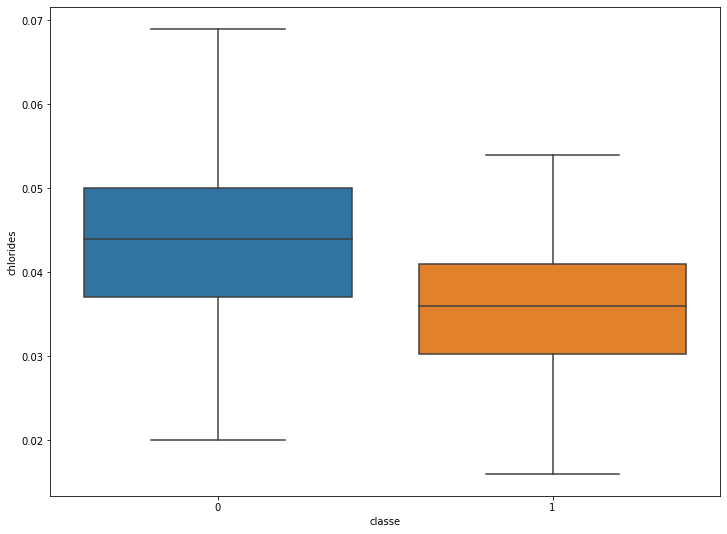

In [56]:
# chlorides
plt.figure(figsize=(12,9))
sns.boxplot(x = 'classe', y = 'chlorides', data= model2_data_adsc)

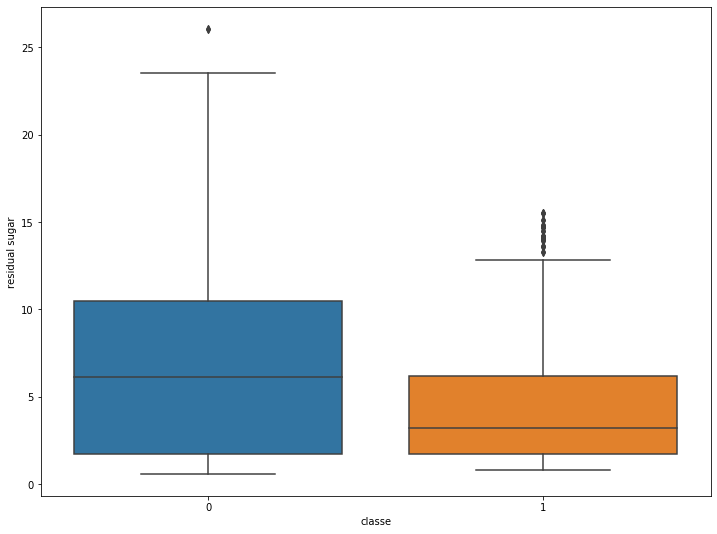

In [57]:
# residual sugar
plt.figure(figsize=(12,9))
sns.boxplot(x = 'classe', y = 'residual sugar', data= model2_data_adsc)

In [58]:
model2_data_adscr = model2_data_adsc[(model2_data_adsc['classe'] == 0) & (model2_data_adsc['residual sugar']< 25)
                                   | (model2_data_adsc['classe'] == 1) & (model2_data_adsc['residual sugar']< 12.5)
                                    ]

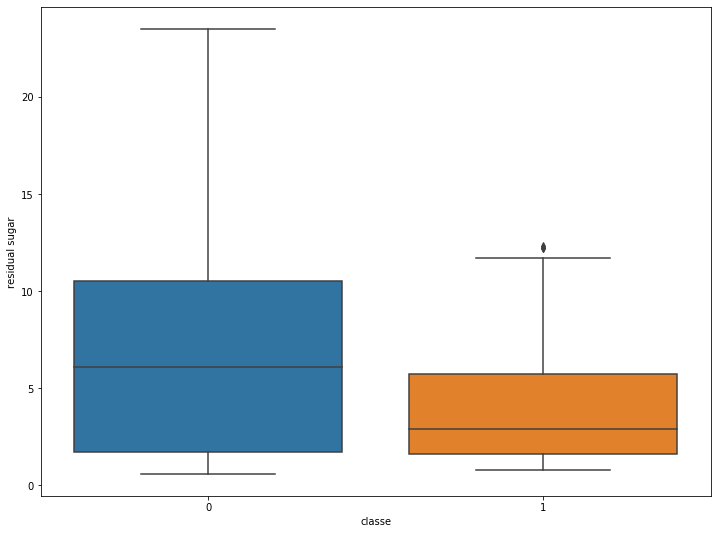

In [59]:
# residual sugar
plt.figure(figsize=(12,9))
sns.boxplot(x = 'classe', y = 'residual sugar', data= model2_data_adscr)

Feita a limpeza das features mais correlacionadas com a classe de avaliação, vamos verificar a mudança nas correlações

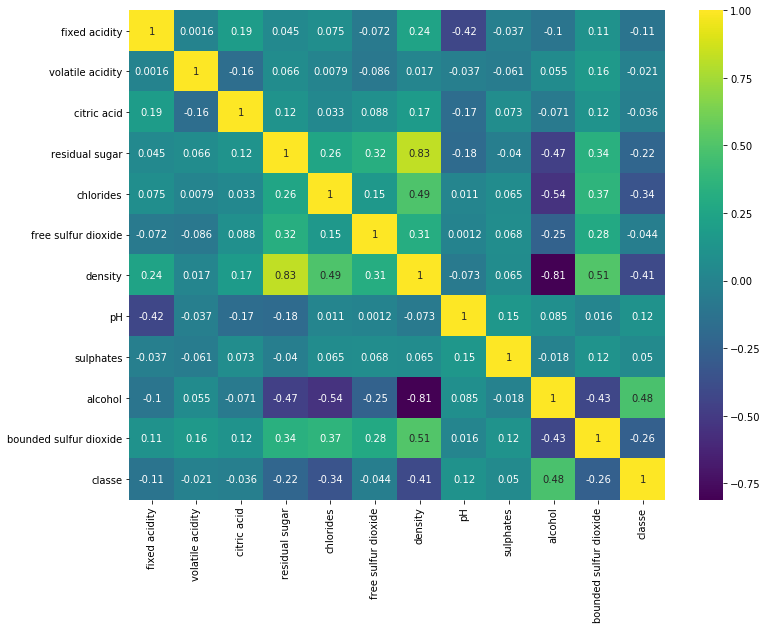

In [60]:
plt.figure(figsize=(12,9))
sns.heatmap(model2_data_adscr.corr(), cmap='viridis', annot = True)

Para este modelo, a feature fixed acidity sofreu uma grande influência da limpeza dos dados, portanto, vamos verificaar a presença de outliers em sua distribuição

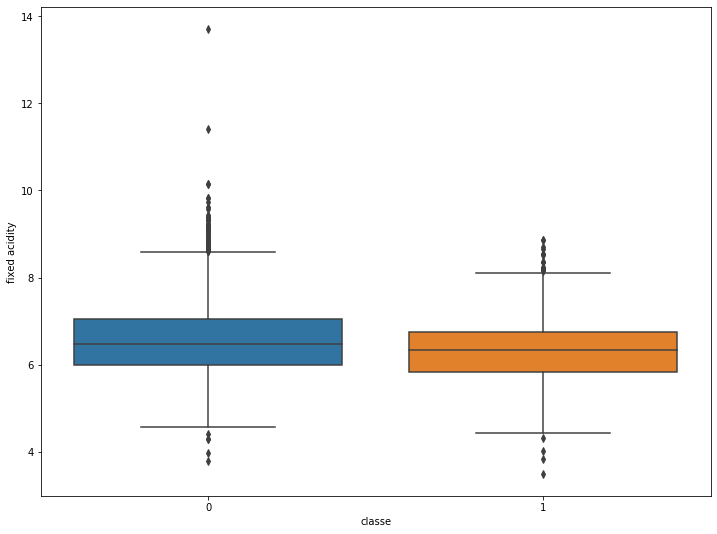

In [61]:
# fixed acidity
plt.figure(figsize=(12,9))
sns.boxplot(x = 'classe', y = 'fixed acidity', data= model2_data_adscr)

A presença de outliers é bem grande para esta variável, mas iremos deixá-la intacta neste momento. Podemos criar um outro modelo onde os outliers de fixed acidity foram limpos.

In [62]:
model2_data_adscr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4449 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fixed acidity           4449 non-null   float64
 1   volatile acidity        4449 non-null   float64
 2   citric acid             4449 non-null   float64
 3   residual sugar          4449 non-null   float64
 4   chlorides               4449 non-null   float64
 5   free sulfur dioxide     4449 non-null   float64
 6   density                 4449 non-null   float64
 7   pH                      4449 non-null   float64
 8   sulphates               4449 non-null   float64
 9   alcohol                 4449 non-null   float64
 10  bounded sulfur dioxide  4449 non-null   float64
 11  classe                  4449 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 611.9 KB


### Train-test-split

In [63]:
X2 = model2_data_adscr.drop('classe', axis=1)
y2 = model2_data_adscr['classe']

In [64]:
X2_train, X2_val, y2_train, y2_val = train_test_split(X2, y2, test_size=0.4, random_state=42)

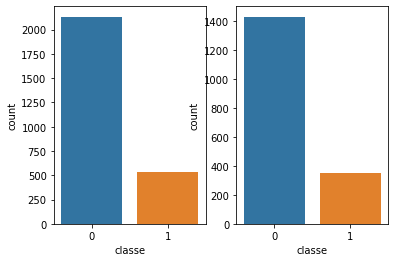

In [65]:
fig, ax =plt.subplots(1,2)
sns.countplot(y2_train, ax=ax[0])
sns.countplot(y2_val, ax=ax[1])

In [66]:
X2_blend, X2_test, y2_blend, y2_test = train_test_split(X2_val, y2_val, test_size=0.5, random_state=42)

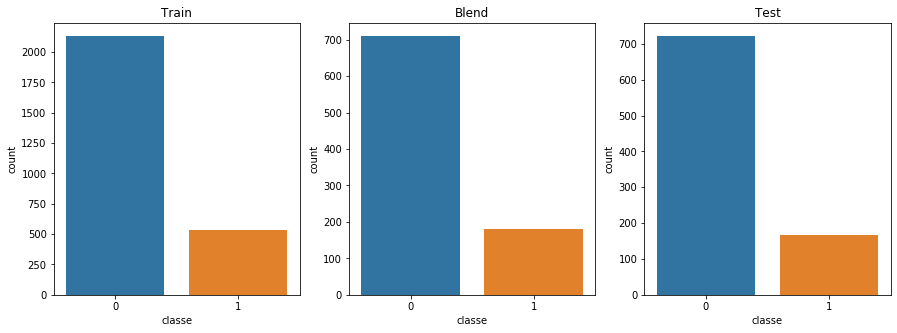

In [67]:
fig, ax =plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(15)
ax[0].set_title('Train')
ax[1].set_title('Blend')
ax[2].set_title('Test')
sns.countplot(y2_train, ax=ax[0])
sns.countplot(y2_blend, ax=ax[1])
sns.countplot(y2_test, ax=ax[2])

### Reescalando as variáveis

In [167]:
scaler2 = StandardScaler()

In [168]:
X2_train_scaled = scaler2.fit_transform(X2_train)

X2_blend_scaled = scaler2.transform(X2_blend)

X2_test_scaled = scaler2.transform(X2_test)

### Modelo 2.1: Random Forest Classifier (Inbalanced Dataset)

In [165]:
grid_rf_21 = GridSearchCV(RandomForestClassifier(), param_grid_rf, verbose=1)

In [169]:
grid_rf_21.fit(X2_train_scaled, y2_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:  1.6min finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000]},
             verbose=1)

In [172]:
grid_rf_21.best_estimator_

RandomForestClassifier(n_estimators=700)

In [173]:
rf_pred_21 = grid_rf_21.predict(X2_test_scaled)

In [174]:
print(classification_report(y2_test, rf_pred_21))
print('\n')
print(confusion_matrix(y2_test, rf_pred_21))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       722
           1       0.81      0.57      0.67       168

    accuracy                           0.89       890
   macro avg       0.86      0.77      0.80       890
weighted avg       0.89      0.89      0.89       890



[[700  22]
 [ 73  95]]


### Modelo 2.2: Random Forest Classifier (Balanced Dataset)

In [175]:
from imblearn.under_sampling import EditedNearestNeighbours

In [176]:
enn = EditedNearestNeighbours()

In [178]:
enn.fit(X2_train_scaled, y2_train)

EditedNearestNeighbours()

In [179]:
X2_enn, y2_enn = enn.fit_sample(X2_train_scaled, y2_train)

In [182]:
grid_rf_enn = GridSearchCV(RandomForestClassifier(), param_grid_rf, verbose=1)

In [183]:
grid_rf_enn.fit(X2_enn, y2_enn)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:  1.3min finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000]},
             verbose=1)

In [184]:
grid_rf_enn.best_estimator_

RandomForestClassifier(n_estimators=600)

In [185]:
rf_pred_enn = grid_rf_enn.predict(X2_test_scaled)

In [186]:
print(classification_report(y2_test, rf_pred_enn))
print('\n')
print(confusion_matrix(y2_test, rf_pred_enn))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88       722
           1       0.51      0.73      0.60       168

    accuracy                           0.82       890
   macro avg       0.72      0.78      0.74       890
weighted avg       0.85      0.82      0.83       890



[[604 118]
 [ 46 122]]


Deste ponto em diante, iremos seguir com o modelo que apresentou o melhor weighted avg para o recall: Inbalanced Dataset

### Modelo 2.3: SVM

### Modelo 2.4: KNN Classifier

### Modelo 2.5: Blended RF Regressor + SVR + KNN into Logistic Classifier